# NDRIndex:  a method for the quality assessment of single-cell RNA-Seq preprocessing data
Article link: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-020-03883-x#Sec3

## Abstract

### Background
Single-cell RNA sequencing can be used to fairly determine cell types, which is beneficial to the medical field, especially the many recent studies on COVID-19. Generally, single-cell RNA data analysis pipelines include data normalization, size reduction, and unsupervised clustering. However, different normalization and size reduction methods will significantly affect the results of clustering and cell type enrichment analysis. Choices of preprocessing paths is crucial in scRNA-Seq data mining, because a proper preprocessing path can extract more important information from complex raw data and lead to more accurate clustering results.
### Results
We proposed a method called NDRindex (Normalization and Dimensionality Reduction index) to evaluate data quality of outcomes of normalization and dimensionality reduction methods. The method includes a function to calculate the degree of data aggregation, which is the key to measuring data quality before clustering. For the five single-cell RNA sequence datasets we tested, the results proved the efficacy and accuracy of our index.
### Conclusions
This method we introduce focuses on filling the blanks in the selection of preprocessing paths, and the result proves its effectiveness and accuracy. Our research provides useful indicators for the evaluation of RNA-Seq data.

## Background
Nowadays, single-cell RNA sequencing is being generally used in biology and iatrology related areas. The efficient methods used in COVID-19 researches these days would be a good example. Many researchers used single cell RNA sequencing data to determine the sensitivity of organs other than the lungs, and found that the heart, esophagus, kidney, and ileum are also munitive organs [1,2,3,4]. One of the main advantages of single-cell RNA sequencing (scRNA-Seq) is that it can be clustered unsupervised to determine cell types [5]. Normalization and dimension reduction methods are typically used for data preprocessing before clustering procedure. The normalization methods are designed to eliminate technical noise in scRNA-Seq data. Previously, many advanced normalization methods were proposed to preprocess scRNA-Seq data, such as TMM [6], SAMstrt [7], Scran [8], BASiCS [9], SCnorm [10] Linnorm [11], ORNA [12] and FSQN [13]. SAMstrt, Scran, SCnorm, Linnorm and TMM preprocesses data by calculating the scaling factor of the gene expression of each cell.

Most single-cell RNA-seq data is sparse, and almost 90% data is zero measurements. so we use dimension reduction methods to convert the high-dimensional data into low-dimensional data. Sammon [14] mapping and T-SNE [15] are dimension reduction methods that keeps the data manifold unchanged, while principal component analysis (PCA) are designed to extract the important information. Methods like LSPCA [16] and ESPCA [17] combines traditional PCA with other algorithms to overcome the shortcomings of PCA. In addition, some clustering methods also provide normalization and dimensionality reduction methods, such as Seurat [18] and SC3 [5].

Various normalization and dimension reduction methods use different data processing algorithms and obtain different clustering results. Ideally, normalization and dimension reduction methods should produce high-quality data, and the aggregation results should be meaningful. Due to poor clustering trends, completely random data is not conducive to clustering [19]. In order to solve this problem, we propose NDRindex (Normalization and Dimensionality Reduction index) to evaluate the degree of data aggregation. By comparing all combinations of normalization and dimension reduction methods, the data with highest NDRindex will be the selected for further clustering.

## Implementation
As input, NDRindex requires a gene expression matrix, normalization methods and dimension reduction methods. To make this step easier, f NDRindex includes five normalization methods TMM, Linnorm, Scale, Scarn, Seurat and three-dimensional reduction methods PCA, tSNE and Sammon.

Then NDRindex evaluates the data qualities. The prepossessed data with the highest NDRindex score are chose and saved, then outputted.

Finally, clustering techniques (k-menas, hclust, etc.), are applied to the selected data. After that, the clustering result is output. The entire workflow can be described as shown in Fig. 1.

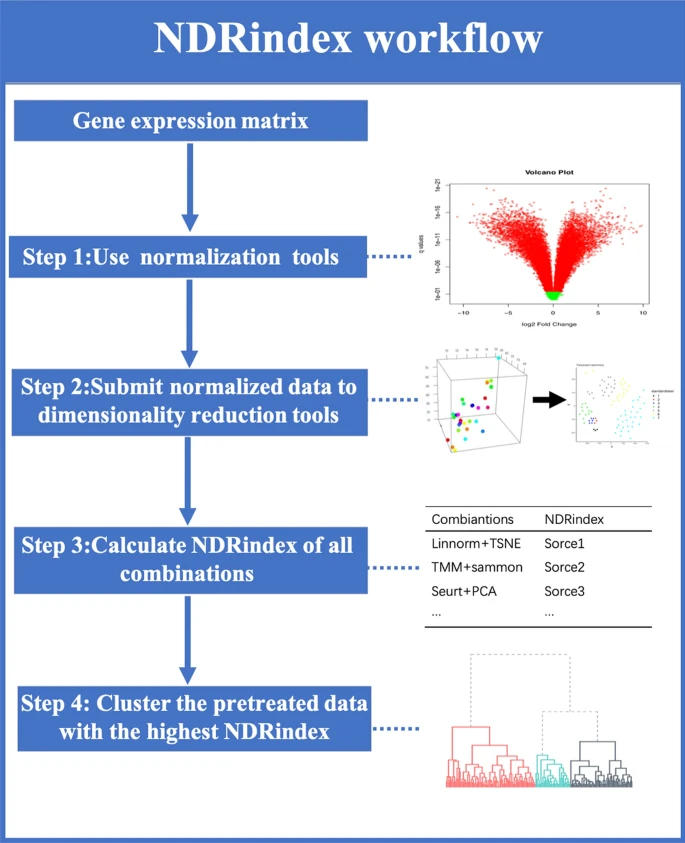

In [1]:
from IPython import display
display.Image("12859_2020_3883_Fig1_HTML.png")

The key to the NDRindex method is an algorithm for evaluating data quality. Not all data is suitable for clustering. If the data set does not contain natural clusters, the clustering results will be meaningless, so it is very important to analyze the tendency of data clustering and evaluate its quality [19]. If the data set does not contain natural clusters, the clustering results will be meaningless, so it is very important to analyze the tendency of data clustering and evaluate its quality [19]. NDRindex algorithm evaluates the cluster tendency by calculating the aggregation degree of data. The higher the degree of clustering, the more points are distributed in a relatively small area, indicating the existence of natural clusters. However, assessing the degree of aggregation is a difficult problem. For example, given two points with the distance 50 cm. If we consider points less than 5 cm apart aggregative, the two points will be considered as two clusters. If we consider points less than 500 cm apart, the two points will probably be considered as one cluster. Thus the degree of aggregation is closely related to the distances of the points and the definition of aggregation. Based on the above assumptions, the NDR index is designed as follows:

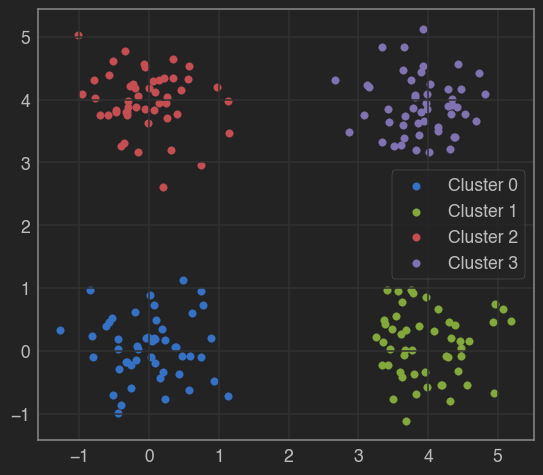

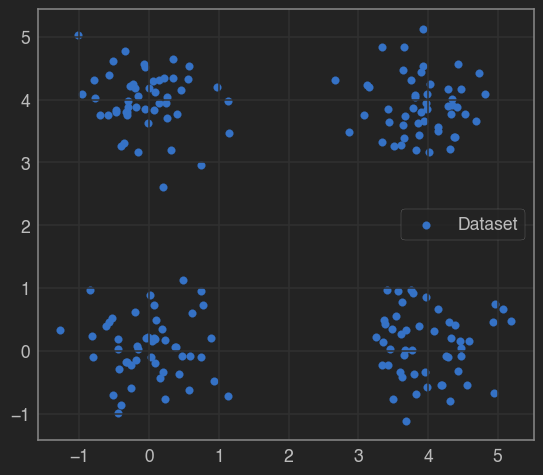

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

def display_clusters(cluster0, cluster1, cluster2, cluster3):
    plt.scatter(cluster0[:, 0], cluster0[:, 1])
    plt.scatter(cluster1[:, 0], cluster1[:, 1])
    plt.scatter(cluster2[:, 0], cluster2[:, 1])
    plt.scatter(cluster3[:, 0], cluster3[:, 1])
    plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])
    plt.show()

def display_dataset(dataset):
    plt.scatter(dataset[:, 0], dataset[:, 1])
    plt.legend(["Dataset"])
    plt.show()
    
def create_normal_cluster(cluster_size=50, sparsity=1):
    return np.random.normal(size=(cluster_size, 2))*sparsity
    
def create_uniform_cluster(cluster_size=50, sparsity=1):
    return np.random.uniform(size=(cluster_size, 2))*sparsity

def create_clusters(method, cluster_size=50, sparsity=1, separation=2):
    cluster0 = method(cluster_size, sparsity)

    cluster1 = method(cluster_size, sparsity)
    cluster1[:, 0] += separation

    cluster2 = method(cluster_size, sparsity)
    cluster2[:, 1] += separation

    cluster3 = method(cluster_size, sparsity)
    cluster3 += separation
    return cluster0, cluster1, cluster2, cluster3
    
def create_dataset(method=create_normal_cluster, cluster_size=50, sparsity=0.5, separation=4, display=False):
    # Dataset generation - demo version
    cluster0, cluster1, cluster2, cluster3 = create_clusters(method, cluster_size=cluster_size, sparsity=sparsity, separation=separation)
    dataset = np.concatenate([cluster0, cluster1, cluster2, cluster3])
    if display:
        display_clusters(cluster0, cluster1, cluster2, cluster3)
        display_dataset(dataset)
    return dataset

dataset = create_dataset(method=create_normal_cluster, display=True)

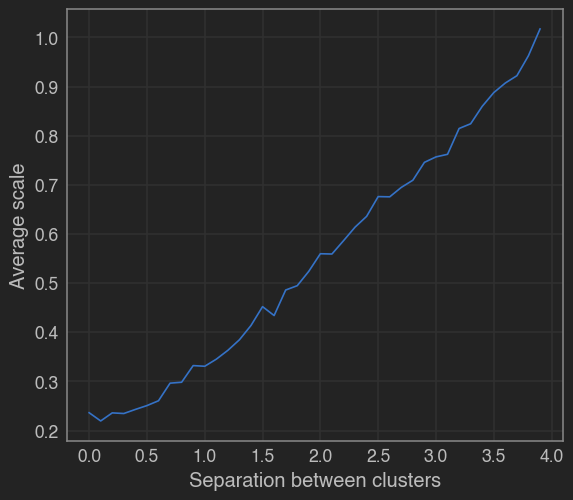

Distances matrix: [[0.         1.00062826 0.69065926 ... 4.53032796 5.6286572  5.71777687]
 [1.00062826 0.         1.66932817 ... 4.19110092 5.23675593 5.37953231]
 [0.69065926 1.66932817 0.         ... 5.04013385 6.14912239 6.2122997 ]
 ...
 [4.53032796 4.19110092 5.04013385 ... 0.         1.1115097  1.1934368 ]
 [5.6286572  5.23675593 6.14912239 ... 1.1115097  0.         0.33679434]
 [5.71777687 5.37953231 6.2122997  ... 1.1934368  0.33679434 0.        ]]


In [3]:
def get_distance(x1, x2):
    """
    Computes the norm of the vector between x1 and x2
    """
    return np.linalg.norm(x2-x1)

def get_distances_lower_quartile(dataset):
    """
    Determines the lower quartile of the distances
    """
    distances = []
    for x1 in range(dataset.shape[0]-1):
        for x2 in range(x1+1, dataset.shape[0]):
            distances.append(get_distance(dataset[x1], dataset[x2]))
    if len(distances)%4 == 0:
        return sorted(distances)[len(distances)//4]
    else:
        return sum(sorted(distances)[len(distances)//4:len(distances)//4+1])/2

def get_distances_matrix(dataset):
    distances = np.zeros((dataset.shape[0], dataset.shape[0]))
    for x1 in range(dataset.shape[0]):
        for x2 in range(dataset.shape[0]):
            distances[x1][x2] = get_distance(dataset[x1], dataset[x2])
    return distances

def get_average_scale(dataset):
    return get_distances_lower_quartile(dataset)/(np.log10(dataset.shape[0]))

separations = np.arange(0, 4, 0.1)
average_scales = []
for distance in separations:
    average_scales.append(get_average_scale(create_dataset(separation=distance)))
    
plt.plot(separations, average_scales)
plt.xlabel("Separation between clusters")
plt.ylabel("Average scale")
plt.show()

print("Distances matrix:", get_distances_matrix(dataset))

Step 2. Clustering and find the point gathering areas.

NDRindex find the point gathering areas by the following step:
- Select a point A randomly. Let A as an individual cluster and let cluster number $K=1$
- Find the point B closest to geometric center of the cluster that A belongs to, if the distance between geometric center and B is smaller than average scale (defined in step1), than add B to the cluster of A and update the geometric center. Otherwise, let B as a new individual cluster, and increase the cluster number K. Repeat step b until all point belongs to a cluster.

After that, NDRindex will find some clusters, each represents a point gathering area.

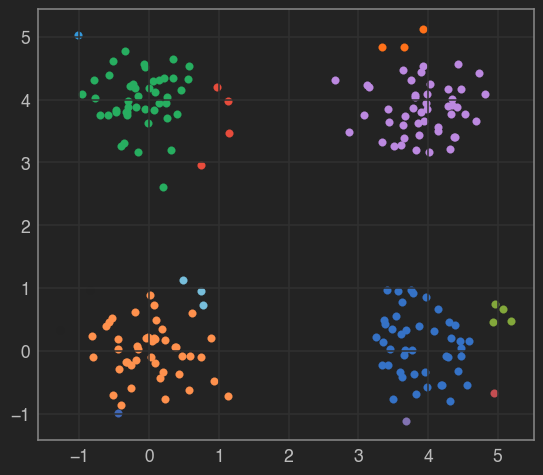

In [4]:
def get_geometric_center(cluster):
    """
    Cluster is a list of points (tuples (x, y)).
    The geometric center is the mass center of the cluster, all the points having a mass of 1.
    """
    return (np.sum(np.array(cluster)[:, 0])/len(cluster), np.sum(np.array(cluster)[:, 1])/len(cluster))

def fill_clusters(dataset):
    K = 0
    clusters = [[[], (0, 0)]]
    
    # Shuffle the points to access them in a random order
    points = np.arange(0, dataset.shape[0], 1)
    np.random.shuffle(points)
    added_points = [points[0]]
    
    # Initialize the first cluster
    clusters[0][0].append(dataset[points[0]])
    clusters[0][1] = dataset[points[0]]
    
    Y = -1 * np.ones(dataset.shape[0])
    
    # Define the average scale
    average_scale = get_average_scale(dataset)
    
    while len(added_points) < dataset.shape[0]:
        minimal_distance = 10e10
        point_to_add = -1
        for p in points:
            if p not in added_points:
                distance = get_distance(dataset[p], clusters[K][1])
                if distance < minimal_distance:
                    minimal_distance = distance
                    point_to_add = p
        if minimal_distance <= average_scale:
            clusters[K][0].append(dataset[point_to_add])
            clusters[K][1] = get_geometric_center(clusters[K][0])
        else:
            K += 1
            clusters.append([[dataset[point_to_add]], dataset[point_to_add]])
        added_points.append(point_to_add)
        Y[point_to_add] = K
        
    # Return only the clusters
    return np.array([np.array(c[0]) for c in clusters], dtype=object)

clusters = fill_clusters(dataset)

for c in clusters:
    plt.scatter(c[:, 0], c[:, 1])
plt.show()

Step 3. Calculating the final index.

For each cluster, the average of the distances from all points to the geometric center is defined as the cluster radius. A smaller cluster radius indicates a smaller and dense point collection area and a larger degree of clustering. Therefore, we define the final index as:

$NDRIndex = 1 - \frac{R}{\frac{M}{\log_{10}{n}}}$

where

$R = \frac{\sum_{i\in set\ of\ all\ clusters} \frac{\sum_{p\in i} distance(p, geometric\ center\ of\ i)}{size\ of\ i}}{K}$

To reduce randomness, NDRindex runs this algorithm 100 times and takes the average value as the final result.
The procedure below can be described as pseudo-code as Fig. 2 described.

In [5]:
def get_cluster_radius(cluster):
    geometric_center = get_geometric_center(cluster)
    distances = [get_distance(cluster[i], geometric_center) for i in range(cluster.shape[0])]
    return sum(distances)/len(distances)

def get_R(clusters):
    return sum([get_cluster_radius(clusters[i]) for i in range(clusters.shape[0])])/clusters.shape[0]

def NDRIndex(dataset, it=100):
    res = 0
    for _ in range(it):
        clusters = fill_clusters(dataset)
        res += 1 - get_R(clusters)/get_average_scale(dataset)
    return res/it

print(NDRIndex(dataset))

0.729301894040611


## Results

To compare the performance of NDRindex, we applied the method to simulated and real data sets. The simulation dataset contains data of different quality. Some of them have obvious patterns and are suitable for grouping, while others are not. As shown in Fig. 3, the results show that our method can clearly distinguish them. For real datasets, we select five widely used single-cell RNA-Seq datasets, five normalization methods (TMM [6], Linnorm [11], scran [8], Seurat [18], scale)) and three dimension reduction methods (tSNE [15], PCA, sammon [14]). We collect the output of each combination of methods and subject them all to four typical clustering algorithms and compare the clustering results with ARI. As shown in Fig. 4, the result shows that the NDRindex algorithm chooses the data with the highest ARI, which shows that the NDRindex algorithm chooses a good combination of methods. We submit the data that NDRindex chosen to hierarchical clustering algorithm, and compare the result with other four methods (SC3 [5], pcaReduce [20], SNN-Cliq [21], SINCERA [22], SRURAT [18]) by ARI. As showed in Fig. 5, the performance of NDRindex shows its relatively high accuracy and stability.

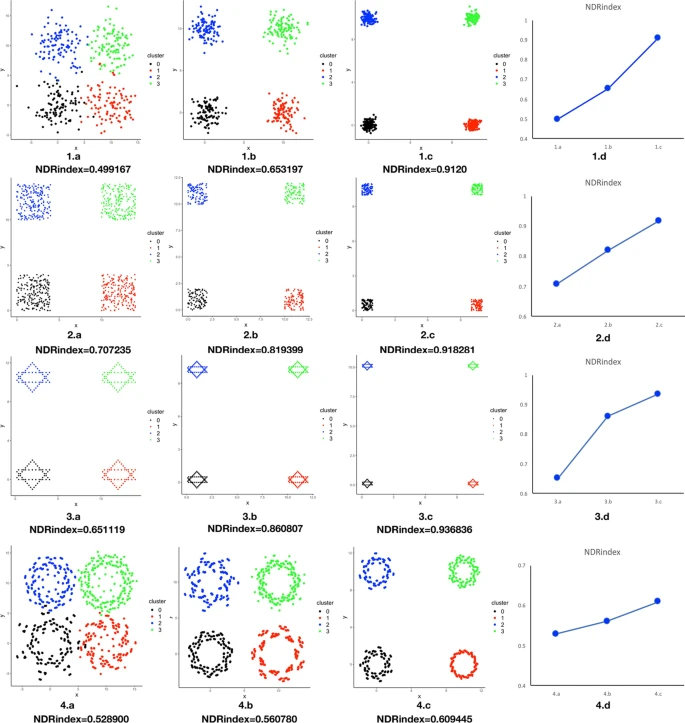

In [6]:
display.Image("12859_2020_3883_Fig3_HTML.png")

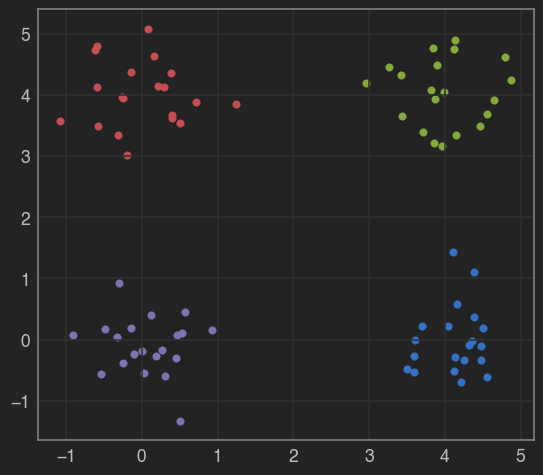

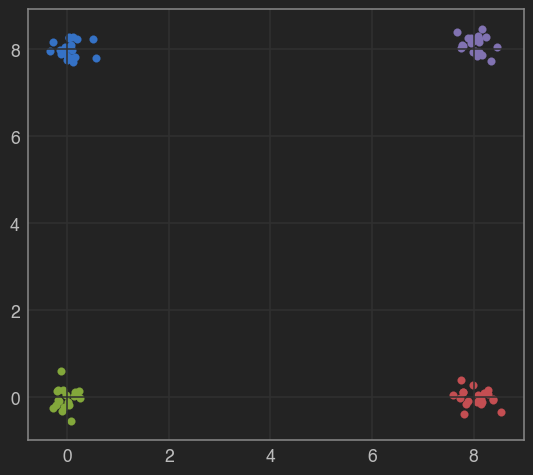

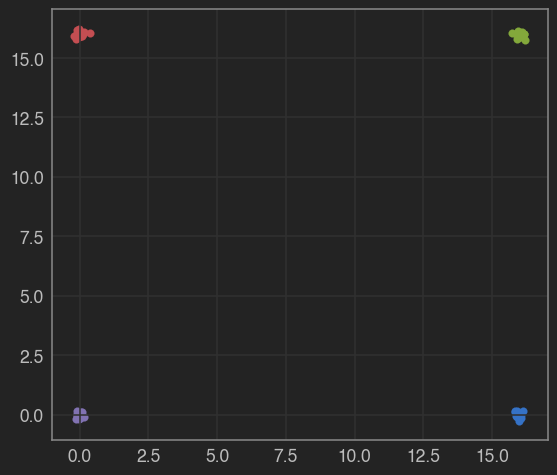

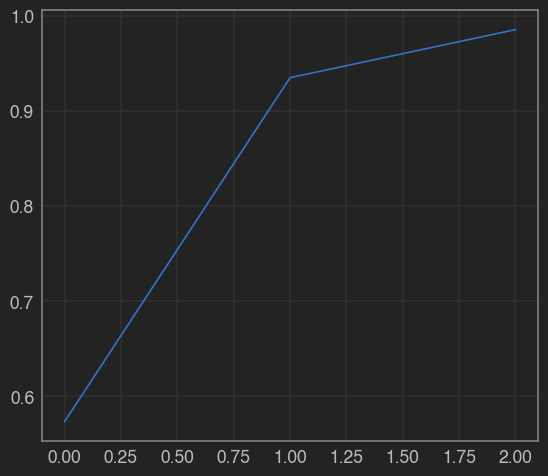

In [7]:
indexes = []

dataset00 = create_dataset(method=create_normal_cluster, cluster_size=20, sparsity=0.5, separation=4)
dataset01 = create_dataset(method=create_normal_cluster, cluster_size=20, sparsity=0.2, separation=8)
dataset02 = create_dataset(method=create_normal_cluster, cluster_size=20, sparsity=0.1, separation=16)

clusters = fill_clusters(dataset00)
for c in clusters:
    plt.scatter(c[:, 0], c[:, 1])
plt.show()
indexes.append(NDRIndex(dataset00))

clusters = fill_clusters(dataset01)
for c in clusters:
    plt.scatter(c[:, 0], c[:, 1])
plt.show()
indexes.append(NDRIndex(dataset01))

clusters = fill_clusters(dataset02)
for c in clusters:
    plt.scatter(c[:, 0], c[:, 1])
plt.show()
indexes.append(NDRIndex(dataset02))

plt.plot(indexes)
plt.show()